The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


data dict:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf


Hİnt for metric : Our mission to classify soldiers races via their body sclales. We want a balanced score for our predictions.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import seaborn as sns

In [2]:
data_male = pd.read_csv("male.csv",encoding="latin1")
df_m = data_male.copy()
data_female = pd.read_csv("female.csv")
df_f = data_female.copy()

# EDA



In [3]:
df_m.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [4]:
df_m.shape

(4082, 108)

In [5]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [6]:
df_f.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [7]:
df_f.shape

(1986, 108)

Subject ID ler iki sütunda da farkli isimde. Concat isleminden önce ayni ismi verecegiz.

In [8]:
df_f = df_f.rename(columns = {"SubjectId":"subjectid"})


In [9]:
df_f.head(1)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand


In [10]:
df = pd.concat([df_m,df_f])


In [11]:
df.shape

(6068, 108)

In [12]:
df.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [13]:
df.isna().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [14]:
df[["DODRace","SubjectNumericRace"]].sample(5)

,DODRace,SubjectNumericRace
947,2,2
3401,1,1
2453,1,1
1942,5,35
1922,1,1


- **SubjectNumericRace:** Deneğin kendi bildirdiği ırkı veya ırklarını gösteren tek veya çok basamaklı bir kod (interview yoluyla doğrulanır).
- **DODRace:** Birden fazla ırk seçmenin bir seçenek olmadığı durumlarda, deneğin kendi bildirdiği tercih edilen tek ırkı gösteren tek bir rakam. Bu değişkenin Defense Manpower Data Center demografik verileriyle karşılaştırılabilir olması amaçlanmıştır.


**SubjectNumericRace** Sütununu düşeriz.


In [15]:
df.drop("SubjectNumericRace", axis = 1, inplace = True)


In [16]:
df.DODRace.value_counts(dropna = False)


1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

- DODRace sınıflandırmalarında value_counts 500 altında olanları düşecegiz.(Eğer value_counts 500 ün altında ise modelimizin öğrenmesini büyük oranda etkileyecektir.)


In [17]:
df2 = df[df["DODRace"].isin([1,2,3])]

In [18]:
df2["DODRace"].unique()

array([1, 2, 3], dtype=int64)

In [19]:
df2.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,3

In [20]:
df2.Weightlbs.value_counts().sort_index(ascending=True)


0        1
86       1
88       1
90       1
95       3
96       1
98       1
100      5
101      1
102      2
103      6
104      2
105      8
106      3
107      2
108      5
109      3
110     20
111      4
112      6
113      3
114      8
115     21
116     16
117      8
118     18
119      6
120     49
121      5
122     12
123     12
124     18
125     53
126     14
127     33
128     34
129     11
130    100
131      9
132     25
133     21
134     16
135    117
136     18
137     30
138     43
139     18
140    146
141     18
142     27
143     32
144     17
145    140
146     13
147     33
148     55
149     18
150    216
151      6
152     31
153     41
154     30
155    154
156     31
157     31
158     46
159     12
160    203
161     22
162     35
163     28
164     21
165    194
166     19
167     35
168     53
169     32
170    224
171     19
172     32
173     34
174     35
175    204
176     24
177     26
178     52
179     18
180    219
181     26
182     31
183     31

<AxesSubplot:xlabel='Weightlbs', ylabel='Heightin'>

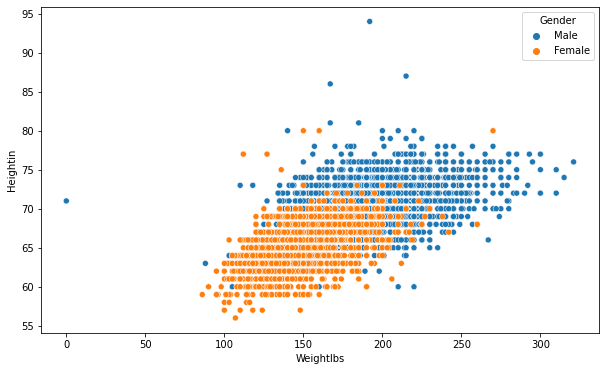

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2, x="Weightlbs", y="Heightin", hue="Gender")

<AxesSubplot:xlabel='Weightlbs', ylabel='Density'>

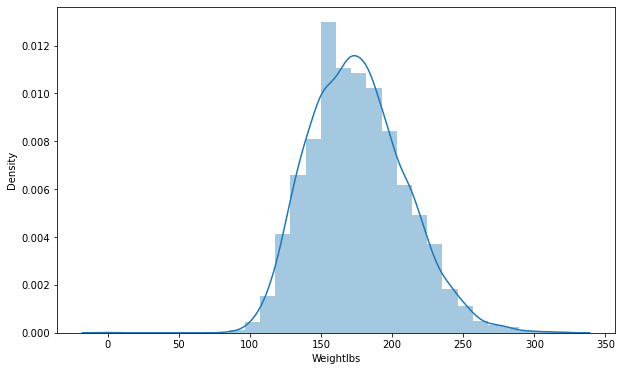

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(df2.Weightlbs, bins=30)

- ***Average adult human weight varies by continent from about 60 kg (130 lb) in Asia and Africa to about 80 kg (180 lb) in North America, with men on average weighing more than women.***
- Ortalama yetişkin insan ağırlığı kıtaya göre Asya ve Afrika'da yaklaşık 60 kg (130 lb) ile Kuzey Amerika'da yaklaşık 80 kg (180 lb) arasında değişir ve erkeklerin ortalama ağırlığı kadınlardan daha fazladır.
- 100 lbs yani ~50 kg altındaki satırları drop ederiz.
- 270 lbs yani ~120 kg üzerindeki satırları da drop ederiz.


In [23]:
df3 = df2[(df2['Weightlbs'] >= 100)&(df2['Weightlbs'] <= 270)]


In [24]:
df3.Weightlbs.value_counts().sort_index(ascending=True)


100      5
101      1
102      2
103      6
104      2
105      8
106      3
107      2
108      5
109      3
110     20
111      4
112      6
113      3
114      8
115     21
116     16
117      8
118     18
119      6
120     49
121      5
122     12
123     12
124     18
125     53
126     14
127     33
128     34
129     11
130    100
131      9
132     25
133     21
134     16
135    117
136     18
137     30
138     43
139     18
140    146
141     18
142     27
143     32
144     17
145    140
146     13
147     33
148     55
149     18
150    216
151      6
152     31
153     41
154     30
155    154
156     31
157     31
158     46
159     12
160    203
161     22
162     35
163     28
164     21
165    194
166     19
167     35
168     53
169     32
170    224
171     19
172     32
173     34
174     35
175    204
176     24
177     26
178     52
179     18
180    219
181     26
182     31
183     31
184     28
185    202
186     21
187     44
188     31
189     20
190    186

___

Ayni sekilde boyu inceleyecegiz.

In [25]:
df3.Heightin.value_counts().sort_index()


56      1
57      5
58      4
59     26
60     70
61     89
62    207
63    248
64    368
65    299
66    522
67    485
68    511
69    604
70    548
71    533
72    462
73    280
74    227
75    110
76     64
77     31
78     15
79      5
80      7
81      2
86      1
87      1
94      1
Name: Heightin, dtype: int64

<AxesSubplot:xlabel='Heightin', ylabel='Count'>

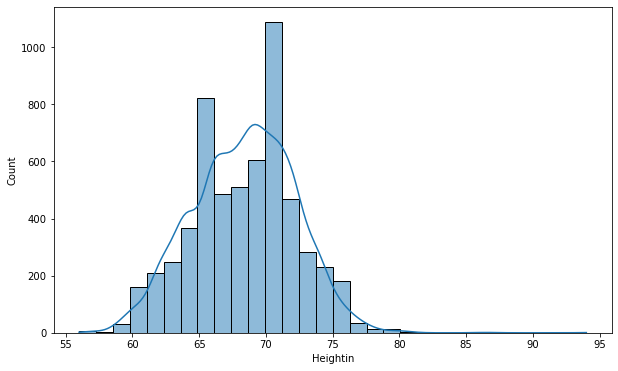

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df2.Heightin, bins=30, kde=True)

- 59 inch yani ~150 cm altındaki satırları drop ederiz.
- 80 inch yani ~203 cm üzerindeki satırları da drop ederiz.


In [27]:
df3 = df3[(df3['Heightin'] >= 59)&(df3['Heightin'] <= 80)]


In [28]:
df3.Heightin.value_counts().sort_index()


59     26
60     70
61     89
62    207
63    248
64    368
65    299
66    522
67    485
68    511
69    604
70    548
71    533
72    462
73    280
74    227
75    110
76     64
77     31
78     15
79      5
80      7
Name: Heightin, dtype: int64

___

In [29]:
df3.SubjectsBirthLocation.value_counts()

California                413
New York                  410
Texas                     384
Indiana                   260
Illinois                  210
Florida                   207
Oklahoma                  205
Michigan                  193
Minnesota                 191
Mississippi               188
Georgia                   166
South Carolina            160
Alabama                   159
North Carolina            145
Ohio                      139
Louisiana                 135
Pennsylvania              127
Virginia                  112
Massachusetts             109
Wisconsin                  95
Germany                    89
New Jersey                 88
Puerto Rico                85
Missouri                   83
Maryland                   78
Colorado                   77
Arizona                    75
Tennessee                  73
Kentucky                   67
Kansas                     61
Washington                 60
Iowa                       55
Arkansas                   53
South Dako

Model vücut tiplerine göre race tahmini yapacak. Dogum yerleri direk race i etkileyecegi icin bu sütunu da düsecegiz.

Kategorik sütunlari inceleyelim.

In [30]:
df3.select_dtypes(exclude=[np.number]).head()

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,Right hand


In [31]:
df3.select_dtypes(exclude=[np.number]).columns #gender haric drop edilecek

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'Ethnicity', 'WritingPreference'],
      dtype='object')

In [32]:
df3.drop(['Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS','SubjectsBirthLocation', \
          'Ethnicity', 'WritingPreference'], axis=1, inplace=True)

In [33]:
df3.drop(['subjectid', 'weightkg', 'Age'], axis=1,inplace=True)


In [34]:
abs(df3.corr()["DODRace"]).sort_values(ascending=False)


DODRace                           1.000000
sittingheight                     0.327152
eyeheightsitting                  0.322500
wristheight                       0.271700
stature                           0.234742
Heightin                          0.230752
elbowrestheight                   0.229965
lateralmalleolusheight            0.219896
acromialheight                    0.219615
cervicaleheight                   0.217297
waistbacklength                   0.209925
axillaheight                      0.207325
bicristalbreadth                  0.205476
suprasternaleheight               0.205336
verticaltrunkcircumferenceusa     0.200208
chestheight                       0.195051
interpupillarybreadth             0.194162
shoulderelbowlength               0.179145
wristcircumference                0.175946
waistheightomphalion              0.175319
overheadfingertipreachsitting     0.171644
heelbreadth                       0.168201
anklecircumference                0.160868
waistfrontl

In [35]:
df3.shape

(5711, 96)

In [36]:
df3 = pd.get_dummies(df3, drop_first=True)

# DATA Preprocessing

# Modelling Implementing
- You can use pipeline (optional)
- You can research over/undersampling methods and after selecting the best model, examine it to see if better scores can be obtained. (https://imbalanced-learn.org/stable/introduction.html)

In [37]:
X = df3.drop("DODRace", axis = 1)
y = df3.DODRace

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.preprocessing import StandardScaler


In [41]:
scaler = StandardScaler()


In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 1. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_model_balanced = LogisticRegression(class_weight="balanced")

In [45]:
log_model_balanced.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [46]:
y_pred = log_model_balanced.predict(X_test_scaled)
y_pred_train = log_model_balanced.predict(X_train_scaled)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix


In [49]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[906  22 212]
 [ 13 319  31]
 [ 46  21 144]]
              precision    recall  f1-score   support

           1       0.94      0.79      0.86      1140
           2       0.88      0.88      0.88       363
           3       0.37      0.68      0.48       211

    accuracy                           0.80      1714
   macro avg       0.73      0.79      0.74      1714
weighted avg       0.86      0.80      0.82      1714



In [50]:
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[2113   51  454]
 [  25  838   57]
 [  83   35  341]]
              precision    recall  f1-score   support

           1       0.95      0.81      0.87      2618
           2       0.91      0.91      0.91       920
           3       0.40      0.74      0.52       459

    accuracy                           0.82      3997
   macro avg       0.75      0.82      0.77      3997
weighted avg       0.88      0.82      0.84      3997



In [51]:
log_model = LogisticRegression()

In [52]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [53]:
y_pred = log_model.predict(X_test_scaled)
y_pred_train = log_model.predict(X_train_scaled)

In [54]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1086   16   38]
 [  34  320    9]
 [ 111   22   78]]
              precision    recall  f1-score   support

           1       0.88      0.95      0.92      1140
           2       0.89      0.88      0.89       363
           3       0.62      0.37      0.46       211

    accuracy                           0.87      1714
   macro avg       0.80      0.73      0.76      1714
weighted avg       0.85      0.87      0.85      1714



In [55]:
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[2519   30   69]
 [  53  849   18]
 [ 230   44  185]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      2618
           2       0.92      0.92      0.92       920
           3       0.68      0.40      0.51       459

    accuracy                           0.89      3997
   macro avg       0.83      0.76      0.79      3997
weighted avg       0.88      0.89      0.88      3997



In [58]:
from sklearn.model_selection import GridSearchCV

GRIDSEARCH

In [59]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 8)
C = np.logspace(0, 10, 8)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [60]:
grid_model = GridSearchCV(log_model_balanced, param_grid = param_grid)

In [61]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([1.00000000e+00, 2.68269580e+01, 7.19685673e+02, 1.93069773e+04,
       5.17947468e+05, 1.38949549e+07, 3.72759372e+08, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [62]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [63]:
y_pred = grid_model.predict(X_test_scaled)

In [64]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[906  22 212]
 [ 13 319  31]
 [ 46  21 144]]
              precision    recall  f1-score   support

           1       0.94      0.79      0.86      1140
           2       0.88      0.88      0.88       363
           3       0.37      0.68      0.48       211

    accuracy                           0.80      1714
   macro avg       0.73      0.79      0.74      1714
weighted avg       0.86      0.80      0.82      1714



## 2. Support Vector Classifier

In [65]:
from sklearn.svm import SVC


In [66]:
svm_model_scaled = SVC()
svm_model_scaled.fit(X_train_scaled, y_train)
y_pred = svm_model_scaled.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1119   13    8]
 [  41  315    7]
 [ 161   19   31]]
              precision    recall  f1-score   support

           1       0.85      0.98      0.91      1140
           2       0.91      0.87      0.89       363
           3       0.67      0.15      0.24       211

    accuracy                           0.85      1714
   macro avg       0.81      0.67      0.68      1714
weighted avg       0.84      0.85      0.82      1714



In [67]:
y_pred = svm_model_scaled.predict(X_train_scaled)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


[[2596   11   11]
 [  48  866    6]
 [ 296   39  124]]
              precision    recall  f1-score   support

           1       0.88      0.99      0.93      2618
           2       0.95      0.94      0.94       920
           3       0.88      0.27      0.41       459

    accuracy                           0.90      3997
   macro avg       0.90      0.73      0.76      3997
weighted avg       0.90      0.90      0.88      3997



## 3. Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)


In [70]:
from sklearn.metrics import confusion_matrix,classification_report


In [71]:
rf_model = RandomForestClassifier(random_state=101, class_weight="balanced")
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)


In [72]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1125   14    1]
 [ 122  239    2]
 [ 189   14    8]]
              precision    recall  f1-score   support

           1       0.78      0.99      0.87      1140
           2       0.90      0.66      0.76       363
           3       0.73      0.04      0.07       211

    accuracy                           0.80      1714
   macro avg       0.80      0.56      0.57      1714
weighted avg       0.80      0.80      0.75      1714



In [73]:
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


[[2618    0    0]
 [   0  920    0]
 [   0    0  459]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2618
           2       1.00      1.00      1.00       920
           3       1.00      1.00      1.00       459

    accuracy                           1.00      3997
   macro avg       1.00      1.00      1.00      3997
weighted avg       1.00      1.00      1.00      3997



## 4. XGBoost

In [74]:
from xgboost import XGBClassifier

In [75]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

[01:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [76]:
y_pred = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)

In [77]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1104   20   16]
 [  46  308    9]
 [ 152   23   36]]
              precision    recall  f1-score   support

           1       0.85      0.97      0.90      1140
           2       0.88      0.85      0.86       363
           3       0.59      0.17      0.26       211

    accuracy                           0.84      1714
   macro avg       0.77      0.66      0.68      1714
weighted avg       0.82      0.84      0.82      1714



In [78]:
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


[[2618    0    0]
 [   0  920    0]
 [   0    0  459]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2618
           2       1.00      1.00      1.00       920
           3       1.00      1.00      1.00       459

    accuracy                           1.00      3997
   macro avg       1.00      1.00      1.00      3997
weighted avg       1.00      1.00      1.00      3997



XGB Gridsearch

In [79]:
param_grid = {"n_estimators":[50,100],'max_depth':[2,3],"learning_rate": [0.05,0.1]}
#, "learning_rate": [0.1, 0.3],"subsample":[0.5, 1], "colsample_bytree":[0.5, 1]

In [80]:
xgb_grid = GridSearchCV(xgb, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[01:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [81]:
y_pred = xgb_grid.predict(X_test)

In [82]:
xgb_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}

In [83]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1118   19    3]
 [ 165  196    2]
 [ 184   24    3]]
              precision    recall  f1-score   support

           1       0.76      0.98      0.86      1140
           2       0.82      0.54      0.65       363
           3       0.38      0.01      0.03       211

    accuracy                           0.77      1714
   macro avg       0.65      0.51      0.51      1714
weighted avg       0.73      0.77      0.71      1714



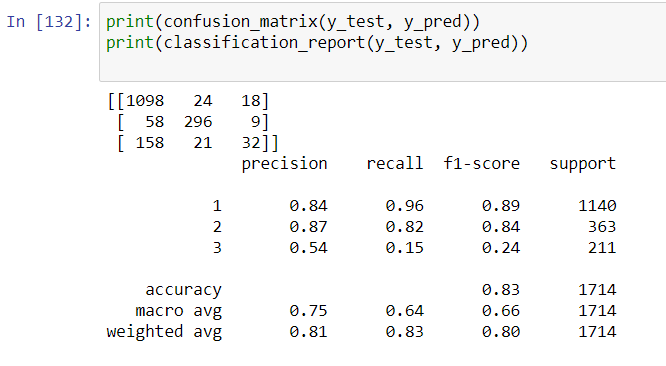

# Choose the best model based on the metric you choose and make a random prediction

---
---